# Exploring Classical and Quantum Fourier Transforms: A Practical Comparative Perspective utilizing IBM Quantum Platform
## Description: Implementing Problem 2 from Section 4.5 with the Qasm Simulator
## Author: Mateusz Szczepański
### File: Test_2.ipynb
#### Date: 05.09.2023

In [16]:
from qiskit import *
from qiskit.circuit.library import QFT
import numpy as np
from qiskit.visualization import plot_histogram

from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, \
Estimator, Session, Options

service = QiskitRuntimeService(channel='ibm_quantum')

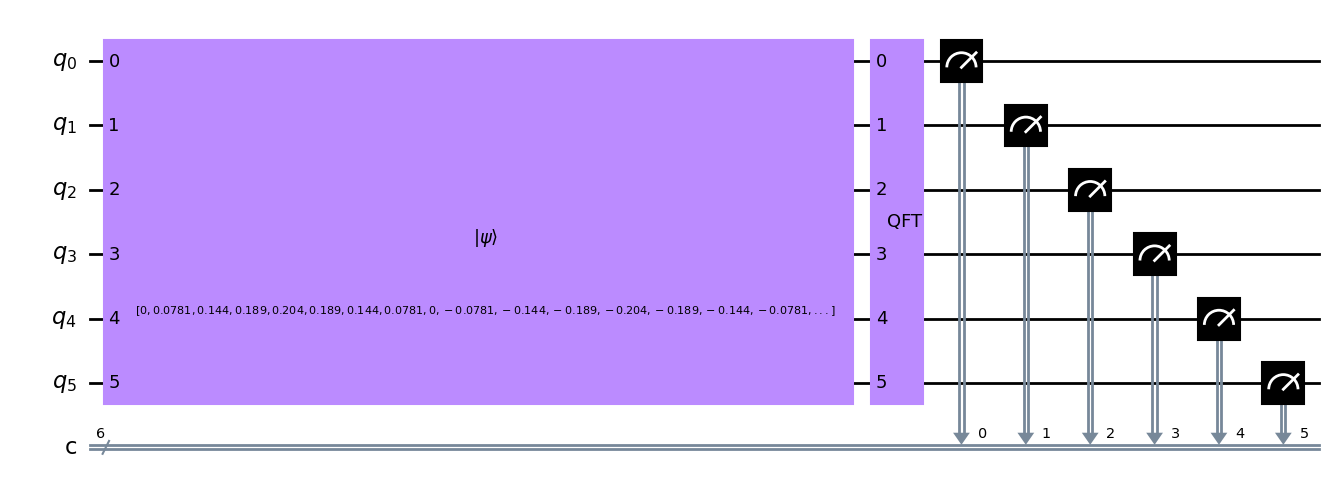

In [11]:
q = QuantumRegister(6,'q') 
c = ClassicalRegister(6,'c') 
qc = QuantumCircuit(q,c)
x = [4*k/64 for k in range(64)]
psi = np.sin(2*np.array(x)*np.pi)
psi[16:32] = 0
psi = psi/np.linalg.norm(psi)
qc.initialize(psi)
qft = QFT(num_qubits=6, do_swaps=True).to_gate()
qc.append(qft, qargs=[0, 1, 2, 3, 4, 5])
qc.measure(range(6), range(6))
qc.draw('mpl').savefig('/home/jovyan/My_Notebooks/Images/qTest_2_0.png')
qc.draw('mpl')

In [12]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=100)
result = job.result()
print(result.get_counts(qc))

{'000100': 44, '111100': 35, '111011': 1, '000110': 1, '111001': 1, '111010': 3, '000011': 4, '000010': 4, '111110': 1, '000001': 2, '001010': 1, '001001': 1, '000101': 1, '111111': 1}


In [18]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy as cp
mpl.rcParams.update(mpl.rcParamsDefault)

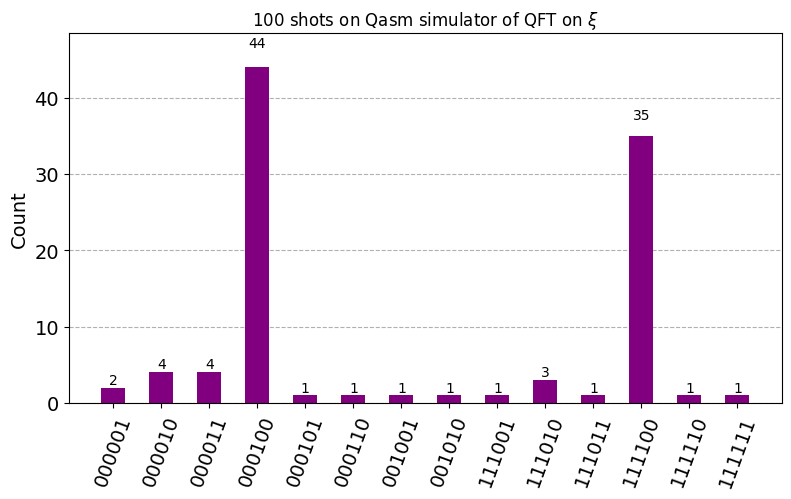

In [25]:
plot_histogram(result.get_counts(qc), color="purple", title=r"100 shots on Qasm simulator of QFT on $\xi$", figsize=(9.2, 7)).savefig('/home/jovyan/My_Notebooks/Images/qTest_2_1.png')
plot_histogram(result.get_counts(qc), color="purple", title=r"100 shots on Qasm simulator of QFT on $\xi$", figsize=(9.2, 4.8))